## 2.1 분석 데이터 검토

In [1]:
import pandas as pd
data=pd.read_csv("data/breast-cancer-wisconsin.csv",encoding='utf-8')
data.head()

C:\Users\revie\AppData\Roaming\Python\Python37\site-packages\pandas\compat\_optional.py:138: UserWarning: Pandas requires version '2.7.0' or newer of 'numexpr' (version '2.6.9' currently installed).
  warnings.warn(msg, UserWarning)


,code,Clump_Thickness,Cell_Size,Cell_Shape,Marginal_Adhesion,Single_Epithelial_Cell_Size,Bare_Nuclei,Bland_Chromatin,Normal_Nucleoli,Mitoses,Class
0,1000025,5,1,1,1,2,1,3,1,1,0
1,1002945,5,4,4,5,7,10,3,2,1,0
2,1015425,3,1,1,1,2,2,3,1,1,0
3,1016277,6,8,8,1,3,4,3,7,1,0
4,1017023,4,1,1,3,2,1,3,1,1,0


In [5]:
data.Class.value_counts()

0    444
1    239
Name: Class, dtype: int64

In [8]:
#데이터의 크기 확인
data.shape

(683, 11)

## 2.2 특성(x)과 레이블(y) 나누기

In [14]:
X=data[data.columns[1:-1]]
y=data[['Class']]

In [18]:
print(X.shape, y.shape)

(683, 9) (683, 1)


## 2.3 train-test 데이터셋 나누기

In [21]:
# train set과 test set의 정상데이터와 비정상 데이터의 비율을 맞추기 위하여 stratify=y를 설정해준다
from sklearn.model_selection import train_test_split
X_train,X_test, y_train, y_test= train_test_split(X,y,random_state=42, stratify=y)

In [24]:
print(y_train.mean())
print(y_test.mean())

Class    0.349609
dtype: float64
Class    0.350877
dtype: float64


## 2.4 정규화

In [31]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
scaler_minmax=MinMaxScaler()
scaler_standard=StandardScaler()

In [32]:
# MinMax 정규화
scaler_minmax.fit(X_train)
X_scaled_minmax_train=scaler_minmax.transform(X_train)
X_scaled_minmax_test=scaler_minmax.transform(X_test)

In [38]:
# 표준화 정규화
scaler_standard.fit(X_train)
X_scaled_standard_train=scaler_standard.transform(X_train)
X_scaled_standard_test=scaler_standard.transform(X_test)

## 2.5 모델 학습

In [39]:
from sklearn.linear_model import LogisticRegression
model=LogisticRegression()
model.fit(X_scaled_minmax_train, y_train)

C:\Users\revie\Anaconda3\lib\site-packages\sklearn\utils\validation.py:985: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LogisticRegression()

In [41]:
pred_train=model.predict(X_scaled_minmax_train)
model.score(X_scaled_minmax_train,y_train)

0.97265625

In [42]:
pred_test=model.predict(X_scaled_minmax_test)
model.score(X_scaled_minmax_test,y_test)

0.9590643274853801

In [43]:
from sklearn.metrics import confusion_matrix
confusion_train=confusion_matrix(y_train,pred_train)
print("훈련데이터 오차행렬 : \n",confusion_train)

훈련데이터 오차행렬 : 
 [[328   5]
 [  9 170]]


In [44]:
confusion_test=confusion_matrix(y_test,pred_test)
print("훈련데이터 오차행렬 : \n",confusion_test)

훈련데이터 오차행렬 : 
 [[106   5]
 [  2  58]]


In [48]:
from sklearn.metrics import classification_report
cfreport_train=classification_report(y_train,pred_train)
print("분류예측 레포트 : \n",cfreport_train)

분류예측 레포트 : 
               precision    recall  f1-score   support

           0       0.97      0.98      0.98       333
           1       0.97      0.95      0.96       179

    accuracy                           0.97       512
   macro avg       0.97      0.97      0.97       512
weighted avg       0.97      0.97      0.97       512



In [49]:
from sklearn.metrics import classification_report
cfreport_test=classification_report(y_test,pred_test)
print("분류예측 레포트 : \n", cfreport_test)

분류예측 레포트 : 
               precision    recall  f1-score   support

           0       0.98      0.95      0.97       111
           1       0.92      0.97      0.94        60

    accuracy                           0.96       171
   macro avg       0.95      0.96      0.96       171
weighted avg       0.96      0.96      0.96       171



In [51]:
#ROC 지표:거짓긍정율과 참긍정율의 구간별 비율로 면적 구한다.
from sklearn.metrics import roc_curve, auc
from sklearn import metrics
false_positive_rate,true_positive_rate,thresholds=roc_curve(y_test,model.decision_function(X_scaled_minmax_test))
roc_auc=metrics.roc_auc_score(y_test, model.decision_function(X_scaled_minmax_test))
roc_auc

0.9923423423423423

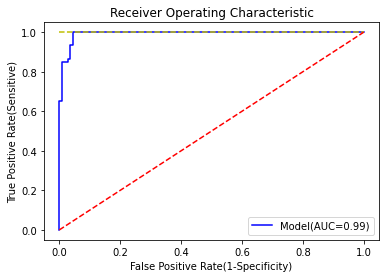

In [56]:
import matplotlib.pyplot as plt
plt.title('Receiver Operating Characteristic')
plt.xlabel('False Positive Rate(1-Specificity)')
plt.ylabel('True Positive Rate(Sensitive)')

plt.plot(false_positive_rate,true_positive_rate,'b',label='Model(AUC=%0.2f)'%roc_auc)
plt.plot([0,1],[1,1],'y--')
plt.plot([0,1],[0,1],'r--')

plt.legend(loc='lower right')
plt.show()

## 2.6 예측값 병합 및 저장

In [58]:
prob_train=model.predict_proba(X_scaled_minmax_train)
y_train['y_pred']=pred_train
y_train[['y_prob0','y_prob1']]=prob_train
y_train

,Class,y_pred,y_prob0,y_prob1
131,0,0,0.981014,0.018986
6,0,0,0.768191,0.231809
0,0,0,0.966431,0.033569
269,0,0,0.988880,0.011120
56,1,1,0.203161,0.796839
...,...,...,...,...
515,1,1,0.021270,0.978730
216,1,0,0.895961,0.104039
312,1,1,0.113440,0.886560
11,0,0,0.987405,0.012595


In [60]:
prob_test=model.predict_proba(X_scaled_minmax_test)
y_test['y_pred']=pred_test
y_test[['y_prob0','y_prob1']]=prob_test
y_test

,Class,y_pred,y_prob0,y_prob1
541,0,0,0.955893,0.044107
549,0,0,0.970887,0.029113
318,0,0,0.943572,0.056428
183,0,0,0.979370,0.020630
478,1,1,0.001305,0.998695
...,...,...,...,...
425,1,1,0.006201,0.993799
314,1,1,0.067440,0.932560
15,1,1,0.436887,0.563113
510,0,0,0.983410,0.016590


In [64]:
Total_test=pd.concat([X_test,y_test],axis=1)
Total_test

,Clump_Thickness,Cell_Size,Cell_Shape,Marginal_Adhesion,Single_Epithelial_Cell_Size,Bare_Nuclei,Bland_Chromatin,Normal_Nucleoli,Mitoses,Class,y_pred,y_prob0,y_prob1
541,5,2,2,2,1,1,2,1,1,0,0,0.955893,0.044107
549,4,1,1,1,2,1,3,2,1,0,0,0.970887,0.029113
318,5,2,2,2,2,1,2,2,1,0,0,0.943572,0.056428
183,1,2,3,1,2,1,3,1,1,0,0,0.979370,0.020630
478,5,10,10,10,6,10,6,5,2,1,1,0.001305,0.998695
...,...,...,...,...,...,...,...,...,...,...,...,...,...
425,10,4,3,10,4,10,10,1,1,1,1,0.006201,0.993799
314,8,10,3,2,6,4,3,10,1,1,1,0.067440,0.932560
15,7,4,6,4,6,1,4,3,1,1,1,0.436887,0.563113
510,3,1,1,2,2,1,1,1,1,0,0,0.983410,0.016590


In [65]:
Total_test.to_csv('data/classfication_test.csv')